# Исследование Робокафе

Шаг №1. Загрузите данные и подготовьте их к анализу

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('/datasets/rest_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


 Итак, в нашем датасете 15 366 строк - достаточный объем для анализа
 пропущенных значений нет
 посмотрим на типы данных и решим что нужно поменять или нет
 и посмотрим что с дубликатами
 предполагаю.что дубликаты могут быть с графе 'object_name'

In [3]:
data.head()


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Вывод-  полных дубликатов нет. Данные готовы к анализу

In [5]:
data['object_name']=data['object_name'].str.lower()
data['object_name'].head()

0                   сметана
1                    родник
2           кафе «академия»
3                пиццетория
4    кафе «вишневая метель»
Name: object_name, dtype: object

In [7]:
#Попробуем поискать дубликаты без id (сделаем запасную табдлицу без жтого столбца)

data1=data[['object_name','chain','object_type','address','number']]
data1.duplicated().sum()


85

In [8]:
data1=data1.drop_duplicates()
data1.info()
data=data1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 5 columns):
object_name    15281 non-null object
chain          15281 non-null object
object_type    15281 non-null object
address        15281 non-null object
number         15281 non-null int64
dtypes: int64(1), object(4)
memory usage: 716.3+ KB


In [9]:
data.sort_values('number', ascending=False).head(20)

,object_name,chain,object_type,address,number
12723,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700
8148,банкетный зал шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,столовая-буфет,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,комбинат питания «управление академсервис»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
4480,рум сервис,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
3686,рум сервис,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
2313,ресторан «альфа»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040
9955,eataly,нет,ресторан,"город Москва, Киевская улица, дом 2",920
5649,столовая московский гуманитарный университет,нет,столовая,"город Москва, улица Юности, дом 5, строение 1",760
13299,white hall,нет,ресторан,"город Москва, Ферганская улица, дом 8",700


# Анализ данных

Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.


In [10]:
rest_type=data.pivot_table(
index='object_type' ,  
values='number' ,  
aggfunc= 'count')

rest_type.reset_index()
total_rest=rest_type['number'].sum()
rest_type['share']=rest_type['number']/total_rest*100
rest_type.sort_values('number', ascending = False)


,number,share
object_type,,
кафе,6071,39.729075
столовая,2584,16.909888
ресторан,2282,14.933578
предприятие быстрого обслуживания,1897,12.414109
бар,855,5.595184
буфет,576,3.769387
кафетерий,395,2.584909
закусочная,348,2.277338
магазин (отдел кулинарии),273,1.786532


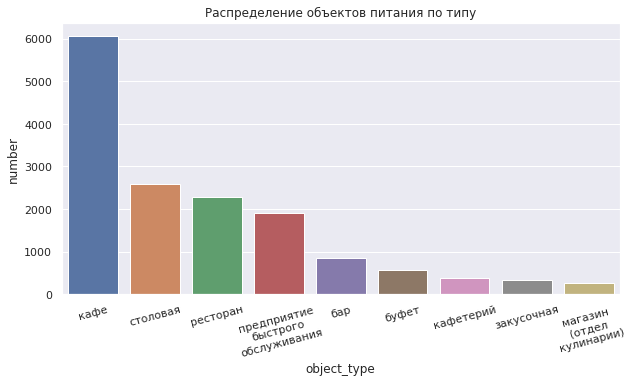

In [11]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(data=rest_type.reset_index().sort_values('number', ascending = False), x='object_type', y='number') 
plt.title ('Распределение объектов питания по типу')
positions, old_labels = plt.xticks(rotation=15)
plt.xticks(positions, ["\n".join(label.get_text().split(" ")) for label in old_labels])
plt.show()

Вывод:
1. 40% рынка занимают "кафе"
2. Далее примерно вравных долях "столовая", "ресторан" и "предпр быстрого обслудивания". Наих долю приходитсясовокупно примерно 42% рынка
3.Третий сегент  - все прочие - примерно 18% рынка: бар, буфет, кафетерий, закусочная и кулинария


Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.


In [12]:
data['chain']=data['chain'].replace({'да':'chain', 'нет':'not_chain'})

table_chain= data.pivot_table(
index='object_type' ,
columns='chain',    
values='object_name' ,  
aggfunc= 'count')
table_chain=table_chain.reset_index()

table_chain['total']=table_chain['not_chain']+table_chain['chain']
table_chain['share_chain']= table_chain['chain']/table_chain['total']*100
table_chain=table_chain.sort_values('share_chain')
table_chain

chain,object_type,chain,not_chain,total,share_chain
8,столовая,3,2581,2584,0.116099
1,буфет,11,565,576,1.909722
0,бар,37,818,855,4.327485
4,кафетерий,52,343,395,13.164557
2,закусочная,56,292,348,16.091954
3,кафе,1396,4675,6071,22.994564
7,ресторан,543,1739,2282,23.794917
5,магазин (отдел кулинарии),78,195,273,28.571429
6,предприятие быстрого обслуживания,788,1109,1897,41.539273


In [13]:
#sns.barplot(data=table_chain.reset_index(), x='chain', y='number') 
#plt.title ('Распределение объектов питания по типу')

Вывод: Подавляющее большинство - несетевые заведения
Следующий вопрос: каким типам заведения хараектерно быть сетевым? 

([<matplotlib.axis.XTick at 0x7f86a94d6f10>,
 <a list of 9 Text xticklabel objects>)

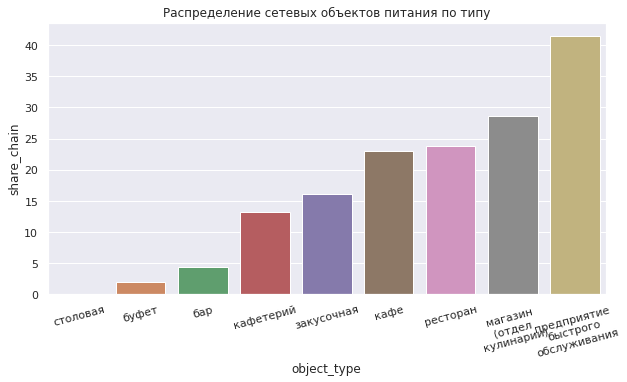

In [14]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.barplot(data=table_chain, x='object_type', y='share_chain') 
plt.title ('Распределение сетевых объектов питания по типу')
positions, old_labels = plt.xticks(rotation=15)
plt.xticks(positions, ["\n".join(label.get_text().split(" ")) for label in old_labels])


Следующий вопрос: Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [15]:
#sns.violinplot(x="object_type", y="number", data=data_chain, palette='rainbow')
#plt.xticks(rotation=60)


In [16]:
#sns.stripplot(x="object_type", y="number", data=data_chain, palette='rainbow')
#plt.xticks(rotation=60)
#plt.title ('Распределение сетевых объектов питания числу мест')

In [17]:
data_chain=data.query('chain== "chain" ')

table_vid=data_chain.pivot_table(
index='object_name' ,  
values='number' ,  
aggfunc= ['mean','count']).reset_index()

table_vid.columns=['object_name','mean_number', 'count_object']
table_vid



,object_name,mean_number,count_object
0,beverly hills diner,88.000000,1
1,bierloga,75.000000,1
2,black & white,40.000000,1
3,bocconcino,66.666667,3
4,boobo,46.000000,1
...,...,...,...
572,ямми микс,2.000000,1
573,ян примус,300.000000,1
574,японский ресторан «ваби-саби»,155.000000,1
575,япоша,105.000000,2


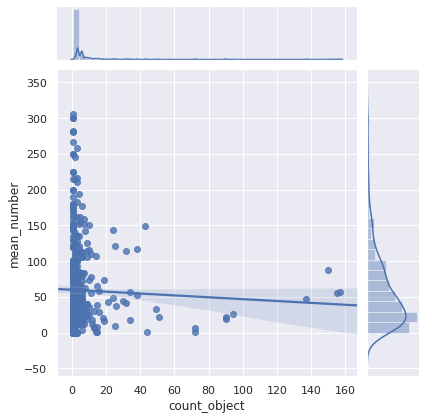

In [18]:
sns.jointplot(x="count_object", y="mean_number", kind='reg', data=table_vid)

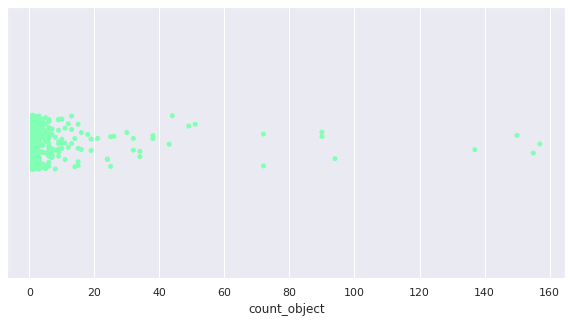

In [19]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.stripplot(x="count_object", data=table_vid, palette='rainbow')


<div class = "alert alert-info" >

Для чего мне этот график? Тут мы видим, что основная масса сетевых заведений описывается типа "до 20 объектов"
И среднее количесво посадочных мест до 100
    
много мест - много заведений (>100; >10)
много мест - мало заведений (>100;<10]
мало мест - много заведений (<100; >10)
мало мест - мало заведения (<100; <10]

Мало заведений  - туда поместим все, что меньше или равно 10 завелений. Вообще странно само наличие 1 сетевого заведения. Что это за сеть, состоящая только из 1 завдеения?
Возмножно, есть филиалы в др городах? но странно
Много или мало мест? вот в чем вопрос. примем меньше 100 и больше 100 мест
                            
Дальше нам нужно бобавить столбец с категорией                        
                            
                            
</div>

In [20]:
def category_new(mest,kolvo ):
    
    if mest<= 100 and kolvo <=10 :
        return 'мало мест, мало заведений'
    if mest<= 100 and kolvo >10 :
        return 'мало мест, много заведений'
    if mest > 100 and kolvo <=10 :
        return 'много мест, мало заведений'
    if mest> 100 and kolvo >10 :
        return 'много мест, много  заведений'
table_vid['category_new']=table_vid.apply (lambda x: category_new(x.mean_number, x.count_object), axis=1)
table_vid.head()        
        

,object_name,mean_number,count_object,category_new
0,beverly hills diner,88.000000,1,"мало мест, мало заведений"
1,bierloga,75.000000,1,"мало мест, мало заведений"
2,black & white,40.000000,1,"мало мест, мало заведений"
3,bocconcino,66.666667,3,"мало мест, мало заведений"
4,boobo,46.000000,1,"мало мест, мало заведений"


In [21]:
table_vid.pivot_table(
index='category_new',
values='object_name',
aggfunc='count')

,object_name
category_new,
"мало мест, мало заведений",448
"мало мест, много заведений",38
"много мест, мало заведений",84
"много мест, много заведений",7


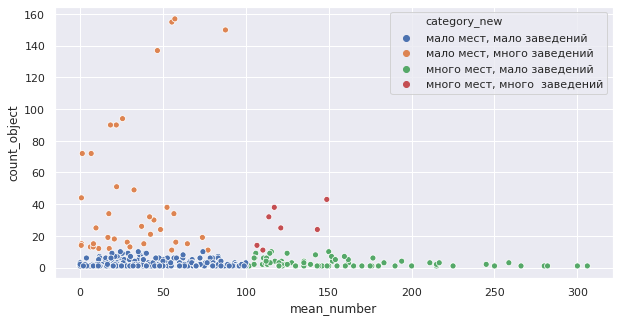

In [22]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.scatterplot(data=table_vid, x="mean_number", y="count_object", hue = 'category_new')


<div class = "alert alert-info" >

Получается, что большинство сетевых завдений относится к категориям "маленькие сети с небольшим числом мест"

</div>

plt.figure(figsize=(12, 3))
sns.set_style("dark")
sns.lineplot(x="mean_seats", y="count", data=table_vid)
plt.title ('График типок сетевых заведений и среднего количества мест')


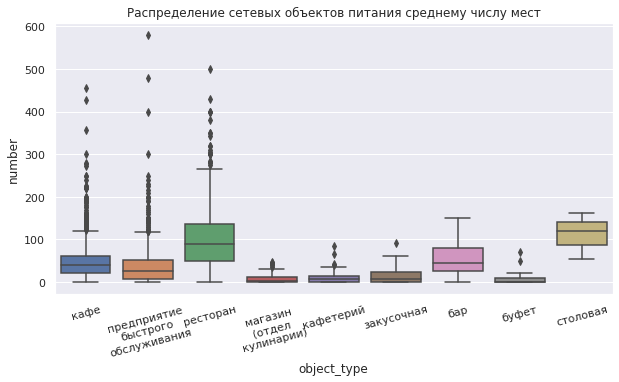

In [23]:

sns.set(rc={'figure.figsize':(10, 5)})

sns.boxplot(data=data_chain, x='object_type', y='number') 
plt.title ('Распределение сетевых объектов питания среднему числу мест')
positions, old_labels = plt.xticks(rotation=15)
plt.xticks(positions, ["\n".join(label.get_text().split(" ")) for label in old_labels])

plt.show()


Вывод:
1. Сетевые завдеения в большинстве своем работают в сегменте до 100 посадочных мест
2. Среднее коичество посдаочных мест в порядке убывания популряности типа завдедения:
кафе - 47 мест
предпр быстр обслуживания - 40
ресторан - 100
бары - 50
остальные виды - до 20 посадочных мест (за исключением столовых) 

Выделим улицу из базового датасета

In [24]:
data['street'] = data['address'].str.split(',').str[1]

data['street'] = data['street'].str.lstrip()
data.head()

,object_name,chain,object_type,address,number,street
0,сметана,not_chain,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,родник,not_chain,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,кафе «академия»,not_chain,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,пиццетория,chain,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,кафе «вишневая метель»,not_chain,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [25]:
top_street=data.pivot_table(
index='street',
values='object_name',
aggfunc='count').sort_values('object_name',ascending=False).head(12).reset_index()
top_street

,street,object_name
0,город Зеленоград,232
1,проспект Мира,203
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,137
8,проспект Вернадского,128
9,Кутузовский проспект,114


Постройте график топ-10 улиц по количеству объектов общественного питания. 
Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

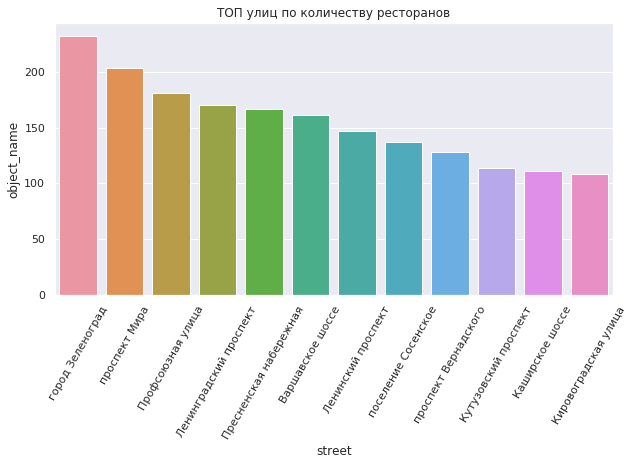

In [26]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.barplot(data=top_street, x='street', y='object_name') 
plt.title ('ТОП улиц по количеству ресторанов')
plt.xticks(rotation=60)

вывод: Зеленоград и Сосенское нужно исключить из дальнейшего анализа (это отдельные субъекты) 

<div class="alert alert-success">


У тебя на самом деле тут просто невнимательность :) У тебя ниже строка:
        
```python
moscow_street_district=moscow_street_district.rename(columns={'streetname': 'street', 'okrug': 'okrug', 'area': 'area'}).head()

```

Т.е. ты оставила `head` от всего датафрейма, поэтому просто нет адресов и получаются пропуски :)
</div>

In [27]:


# Сохранение с hubofdata в YandexCloud 
# df = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
# df.to_csv('mosgaz-street.csv')

# Загрузка из YandexCloud 
df = pd.read_csv('mosgaz-street.csv') [['streetname', 'okrug', 'area']]
moscow_street_district=df
# moscow_street_district=moscow_street_district.rename(columns={'streetname': 'street', 'okrug': 'okrug', 'area': 'area'}).head()
moscow_street_district=moscow_street_district.rename(columns={'streetname': 'street', 'okrug': 'okrug', 'area': 'area'})
moscow_street_district.head()

,street,okrug,area
0,Выставочный переулок,ЦАО,Пресненский район
1,улица Гашека,ЦАО,Пресненский район
2,Большая Никитская улица,ЦАО,Пресненский район
3,Глубокий переулок,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,ЦАО,Пресненский район


In [28]:
moscow_street_district['street'] = moscow_street_district['street'].str.strip()

top_street['street'] = top_street['street'].str.strip()


moscow_street_district['street'] = moscow_street_district['street'].str.strip()

top_street['street'] = top_street['street'].str.strip()
rest_district_top = (
top_street.merge(moscow_street_district, on='street', how='left') 
.groupby('area').agg({'street': 'count', 'object_name': 'sum'}).rename(columns={'street': 'street_count', 'object_name': 'rest_count' })
.sort_values('rest_count', ascending=False)
.reset_index()
)


rest_district_top.head()


,area,street_count,rest_count
0,Район Теплый Стан,2,328
1,Обручевский район,2,328
2,Донской район,2,308
3,Район Проспект Вернадского,2,275
4,Ломоносовский район,2,275


In [29]:
top_10_area=rest_district_top.pivot_table(
index='area',
values='rest_count',
aggfunc='sum').sort_values('rest_count',ascending=False)
top_10_area=top_10_area.reset_index()
top_10_area

,area,rest_count
0,Район Теплый Стан,328
1,Обручевский район,328
2,Донской район,308
3,Район Проспект Вернадского,275
4,Ломоносовский район,275
5,Район Тропарево-Никулино,275
6,Район Гагаринский,275
7,Район Нагатино-Садовники,272
8,Район Чертаново Центральное,269
9,Район Чертаново Северное,269


In [30]:
# moscow_street_district
with pd.option_context('display.max_colwidth', -1):
    display(top_street.merge(moscow_street_district, on='street').groupby('street').agg(oject_number=('object_name','first'),area=('area','unique')))

,oject_number,area
street,,
Варшавское шоссе,161,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
Каширское шоссе,111,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
Кировоградская улица,108,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]"
Кутузовский проспект,114,"[Район Дорогомилово, Район Фили-Давыдково]"
Ленинградский проспект,170,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
Ленинский проспект,147,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
Пресненская набережная,167,[Пресненский район]
Профсоюзная улица,181,"[Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан]"
город Зеленоград,232,"[Район Крюково, Район Матушкино-Савелки, Панфиловский район]"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text xticklabel objects>)

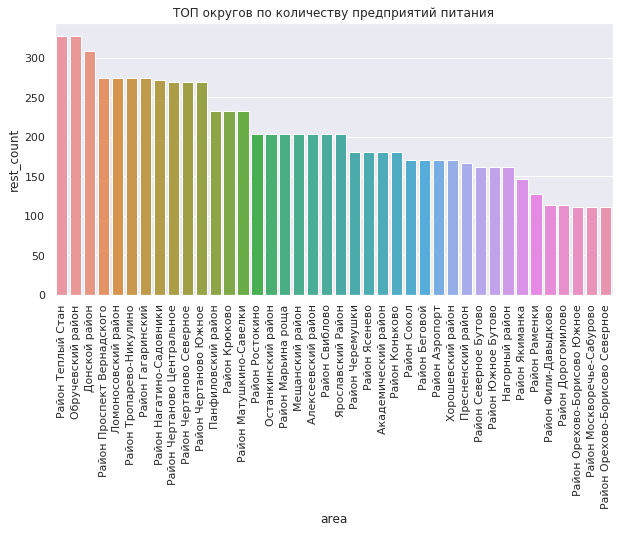

In [31]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.barplot(data=top_10_area, x='area', y='rest_count') 
plt.title ('ТОП округов по количеству предприятий питания')
plt.xticks(rotation=90)

Вывод: Наибольшее количество предприятий питания сосредоточено в следующих районах Москвы (топ -3) 
Обручевский
Теплый Стан
Донской



Достаточно удивительное распределение.Вызывает удивелние ТЕплый стан.  

In [32]:
top_street.merge(moscow_street_district, on='street', how='left')
top_street.head()

,street,object_name
0,город Зеленоград,232
1,проспект Мира,203
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,167


Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [33]:
one_street=data.pivot_table(
index='street',
values='object_name',
aggfunc='count').reset_index().sort_values('object_name')
one_street=one_street.query('object_name==1')
one_street['object_name'].count()

579

Сформировали таблицу с улицами, где находится всего по 1 предприятию обзественног опитания. Получили 579 строк и 579 улиц. Примерно 3% обьектов питания стоят по 1 на 1 улице 

Дальше посомотрим на районы Москвы, где находятся эти улицы

In [34]:
one_street['street'] = one_street['street'].str.strip()
one_street = one_street.merge(moscow_street_district, on='street', how='left')
one_street.head()

one_street2=one_street
one_street2

#не понимаю откуда берутся все эти okrug_x и okrug_y ((((()))))


,street,object_name,okrug,area
0,улица Недорубова,1,NaN,NaN
1,Театральная аллея,1,САО,Район Аэропорт
2,Таёжная улица,1,СВАО,Лосиноостровский район
3,Газгольдерная улица,1,ЮВАО,Нижегородский район
4,Тарханская улица,1,ЮВАО,Район Выхино-Жулебино
...,...,...,...,...
617,улица Академика Семёнова,1,ЮЗАО,Район Южное Бутово
618,улица Алексея Дикого,1,ВАО,Район Новогиреево
619,5-й проезд Марьиной Рощи,1,СВАО,Район Марьина роща
620,65-й километр Московской Кольцевой Автодороги,1,NaN,NaN


In [35]:
one_street2.pivot_table(
index='area',
values='object_name',
aggfunc='sum').sort_values('object_name',ascending=False)

,object_name
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
...,...
Район Марьино,1
Район Матушкино-Савелки,1
Район Метрогородок,1


Вывод: Есть в цетнре видимо оченб короткие улицы) 

Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
Для ответа на этот вопрос - возьмем топ-10 улиц и проанализируем с помощью хитмэпа


In [36]:

#final_table = (
#data.groupby('street', as_index=False)['id'].count()
#.sort_values('id', ascending=False)
#.head(10)
#.rename(columns={'id': 'rest_count'})
#.merge(data, on='street')
#.sort_values('rest_count', ascending=False)
#.pivot_table(index='street', columns='object_type', values='number', aggfunc='count')
    #.fillna('0')
    #.astype(int)
#)

#final_table



In [37]:
#sns.heatmap(final_table, annot=True, cmap='Greens')
#plt.title('Распределение количества посадочных мест по типам заведений по ТОП-улицам', fontsize=17)

In [38]:
final=data.query('street in ["проспект Мира", "Профсоюзная улица","Ленинградский проспект","Пресненская набережная","Варшавское шоссе","Ленинский проспект","проспект Вернадского","Кутузовский проспект","Каширское шоссе", "Кировоградская улица"]')

final

,object_name,chain,object_type,address,number,street
151,кафе «андерсон»,chain,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,кафе «subway»,chain,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,кафе «ламаджо»,not_chain,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,шаурма в пите,not_chain,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,выпечка,not_chain,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...
15308,додо пицца,chain,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,милти,chain,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,кальянная «мята lounge»,chain,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,мята,chain,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


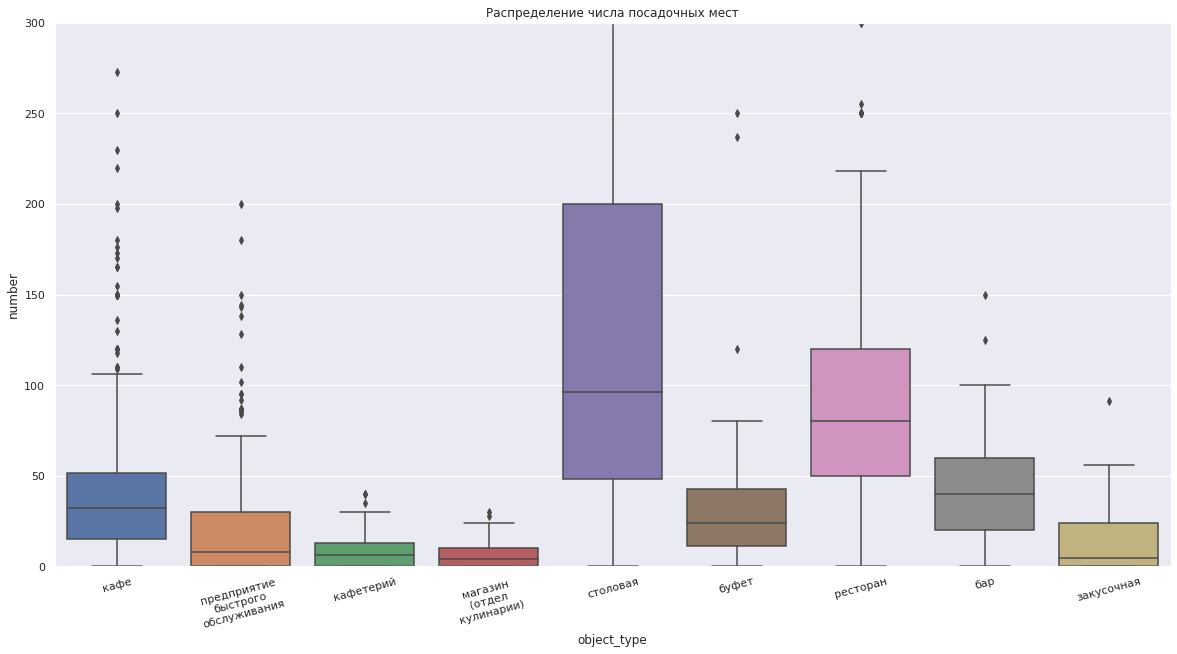

In [39]:
#из-за наличия огромных выборосов ограничила ось Y - иначе масштаб теряется
sns.set(rc={'figure.figsize':(20, 10)})

sns.boxplot(data=final, x='object_type', y='number') 
plt.ylim(0, 300)
plt.title ('Распределение числа посадочных мест')
positions, old_labels = plt.xticks(rotation=15)
plt.xticks(positions, ["\n".join(label.get_text().split(" ")) for label in old_labels])
plt.show()

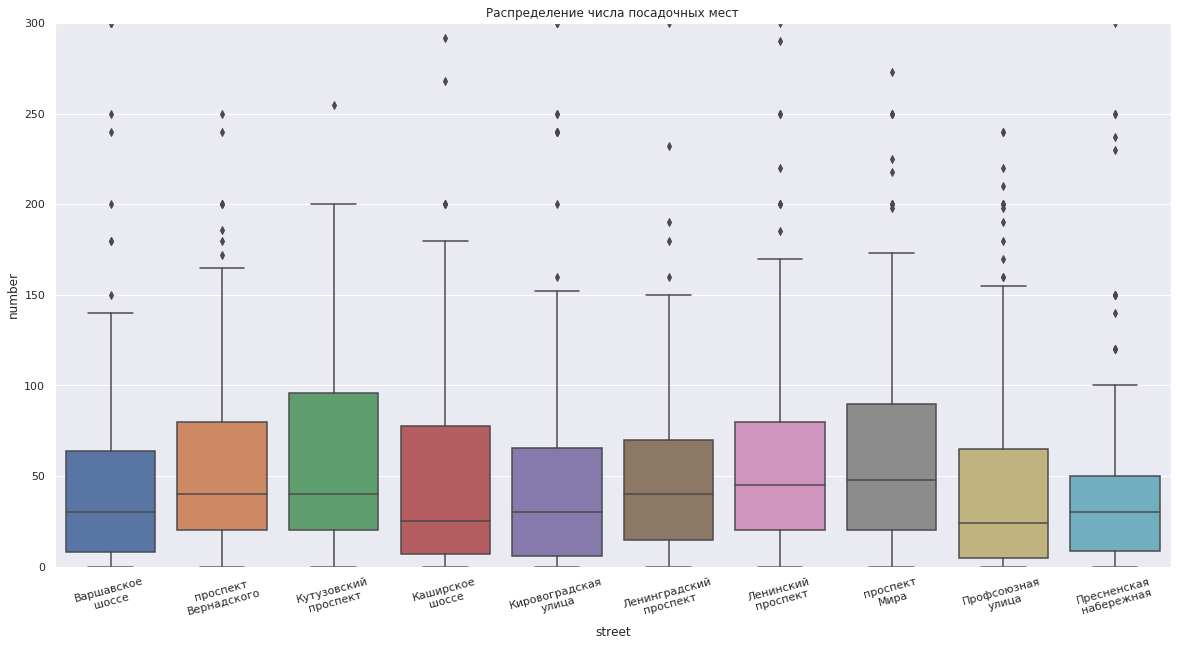

In [40]:
sns.set(rc={'figure.figsize':(20, 10)})

sns.boxplot(data=final, x='street', y='number') 
plt.ylim(0, 300)
plt.title ('Распределение числа посадочных мест')
positions, old_labels = plt.xticks(rotation=15)
plt.xticks(positions, ["\n".join(label.get_text().split(" ")) for label in old_labels])
plt.show()

Вывод такой: кафе имеют максимальное количество посадочных  мест , далее следуют ресторраны и фастфуд. Вроде ничего не обясного, в рамках логики. Аномалию имеет Зеленоград в качестве столовой. Но само по собе попадания Зеленограда в топ-10 можно счиать аномалией. И не рассмотривать в принципе в этом районе-городе-улице тест-драйв нового формата. Если мы по преднему расмтариваем формат кафе: то рекомендация по посадочным местам в рамках 40-100 человек. 

Общий вывод по работе:
Проанализировали датасет, состоящий из 15 266 строк
Данные были подготовлены хорошо, предобработкой  данных заниматься не было необходимости

Исходя из имеющихся данных: 
40%  рынка по количеству занимают "кафе"
Далее примерно вравных долях "столовая", "ресторан" и "предпр быстрого обслудивания". На их долю приходитсясовокупно примерно 42% рынка
Третий сегент - все прочие - примерно 18% рынка: бар, буфет, кафетерий, закусочная и кулинария

Подавляющее большинство - несетевые заведения

Если рассматривать структуру сетевых заведений: лидер по типу - это кафе - 47% от общей доли сетевых заведений Далее следуют предпр быстрого обслуживания и рестораны - по 26 и 18 проц соответственно Все остальные типы представлены слабо на их долю приходится около 7%, и ими можно пренебречь.

Можно сказать, что большинство сетевых  заведений работают в сегменте 40- 100 посадочных мест. 

Среднее коичество посдаочных мест в порядке убывания популярности типа завдедения:
кафе - 47 мест
предпр быстр обслуживания - 40
ресторан - 100
бары - 50
остальные виды - до 20 посадочных мест (за исключением столовых) 

Наибольшее количество предприятий питания сосредоточено в следующих округах Москвы: Юзао ЮАО Зеленоград (как отдельный город в городе) СВАО САО ЦАО. само по собе попадания Зеленограда в топ-10 можно счиать аномалией. И не рассмотривать в принципе в этом районе-городе-улице тест-драйв нового формата. Если мы по преднему расмтариваем формат кафе: то рекомендация по посадочным местам в рамках 40-100 человек. 



Финальный вывод: 

Рекомендуемый формат заведения: кафе

Количество посадочных мест: 40 -100 

Район расположения. Одназнаяно не Зеленоград (хоть он и входит топ-10). Далее рекомендую дополнительные кастдевы с ЦА. Необходимо обрисовать портрет ЦА и понять в каких районах/местах Москвы проводит время ЦА. Рекомендуемые районы для анализа: ЮЗАО, ЮАО,СВАО, САО, ЦАО. 

Возможность развития сети: ДА (если это формат кафе или фастфуд) 







Презентация: https://docs.google.com/presentation/d/1Ex_QaFDiDfNyAeEmqD7lr7Jr9VycCtFASTubl2vcfq0/edit#slide=id.p